<a href="https://colab.research.google.com/github/ijaycyndy/Data-Cleaning-Using-SQL/blob/main/Pozitive_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:

import pandas as pd
import numpy as np


import pandas as pd

# 1  read payment_month as plain text
df = pd.read_csv(
        "/content/sample_data/collab payment data.csv",
        dtype={"payment_month": "string"}
)

# 2  parse contract_end_date (DD/MM/YYYY)
df["contract_end_date"] = pd.to_datetime(
        df["contract_end_date"],
        dayfirst=True,
        errors="raise"
)

# 3  custom parser for the mixed payment_month strings
def parse_payment(s: str):
    s = s.strip()
    if "-" in s:
        # pattern like 2023-01-05  (Y-D-M)
        return pd.to_datetime(s, format="%Y-%d-%m", errors="coerce")
    elif "/" in s:
        # pattern like 01/05/2023  (D/M/Y)
        return pd.to_datetime(s, dayfirst=True, errors="coerce")
    else:
        return pd.NaT          # unexpected layout → NaT

df["payment_month"] = df["payment_month"].apply(parse_payment)

# ----- sanity check: raise if any payment_month failed to parse -----
if df["payment_month"].isna().any():
    bad_rows = df[df["payment_month"].isna()].head()
    raise ValueError(
        "Some payment_month strings could not be parsed. "
        f"Sample bad rows:\n{bad_rows}"
    )
# -------------------------------------------------------------------


# 4  retain raw text for audit
df["payment_month_raw"] = df["payment_month"].dt.strftime("%Y-%m-%d")

# 5  remove zeros & flag clawbacks
df = df[df["amount_paid"] != 0]
df["is_clawback"] = df["amount_paid"] < 0

df["contract_status"] = np.where(
    df["contract_end_date"] < pd.Timestamp("2025-07-01"),
    "inactive",
    "active"
)

df

/tmp/ipython-input-74-823520061.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["is_clawback"] = df["amount_paid"] < 0
/tmp/ipython-input-74-823520061.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["contract_status"] = np.where(


,supplier,mpan_mprn,contract_end_date,amount_paid,payment_month,Payment_Type,payment_month_raw,is_clawback,contract_status
0,Pozitive Energy,9341669006,2023-07-10,0.75,2023-05-01,Recurring,2023-05-01,False,inactive
1,Pozitive Energy,4232717110,2023-08-08,0.31,2024-05-01,Recurring,2024-05-01,False,inactive
3,Pozitive Energy,1824156410,2024-07-31,0.79,2023-08-01,Recurring,2023-08-01,False,inactive
5,Pozitive Energy,9341669006,2023-07-10,0.20,2022-11-01,Recurring,2022-11-01,False,inactive
7,Pozitive Energy,2520115710,2026-01-31,0.50,2025-04-01,Recurring,2025-04-01,False,active
...,...,...,...,...,...,...,...,...,...
23882,TotalEnergies,1100010974209,2026-03-31,579.67,2025-02-28,Recurring,2025-02-28,False,active
23883,TotalEnergies,1507954199998,2024-09-30,967.09,2024-09-30,Recurring,2024-09-30,False,inactive
23884,TotalEnergies,1416632240000,2025-12-31,86.86,2025-01-31,Recurring,2025-01-31,False,active
23885,TotalEnergies,2700001843909,2026-07-31,735.51,2025-02-28,Recurring,2025-02-28,False,active


In [ ]:
check = df[df["mpan_mprn"] == 1848605]

check

,supplier,mpan_mprn,contract_end_date,amount_paid,payment_month,payment_month_raw,is_clawback
1005,Pozitive Energy,1848605,2024-02-05,25.58,2024-01-01,2024-01-01,False
2439,Pozitive Energy,1848605,2024-02-05,30.13,2024-02-01,2024-02-01,False
2450,Pozitive Energy,1848605,2024-02-05,24.07,2024-02-01,2024-02-01,False
4956,Pozitive Energy,1848605,2024-02-05,88.14,2023-04-01,2023-04-01,False
5530,Pozitive Energy,1848605,2024-02-05,18.01,2024-04-01,2024-04-01,False
6423,Pozitive Energy,1848605,2024-02-05,2.52,2023-05-01,2023-05-01,False
8163,Pozitive Energy,1848605,2024-02-05,23.06,2023-06-01,2023-06-01,False
10086,Pozitive Energy,1848605,2024-02-05,15.32,2023-07-01,2023-07-01,False
11692,Pozitive Energy,1848605,2024-02-05,8.42,2023-08-01,2023-08-01,False
14209,Pozitive Energy,1848605,2024-02-05,11.11,2023-09-01,2023-09-01,False


column	meaning
gross_amount	sum of positive payments in that month
clawback_amount	sum of negative payments (refunds)
net_amount	gross + clawback (true cash effect)
num_payments	payment count

In [76]:
# 1. Create month key
df["month_period"] = df["payment_month"].dt.to_period("M")

# 2. Aggregate per MPAN-month-supplier
monthly = (
    df.groupby(["supplier", "mpan_mprn", "month_period"])
      .agg(
          gross_amount    = ("amount_paid",   lambda s: s[s > 0].sum()),
          net_amount      = ("amount_paid",   "sum"),
          clawback_amount = ("amount_paid",   lambda s: s[s < 0].sum()),
          num_payments    = ("amount_paid",   "size")
      )
      .reset_index()
)

# 3. Build calendar per mpan-supplier up to June 2025
last_period = pd.Period("2025-06", freq="M")

rows = [
    pd.DataFrame({
        "mpan_mprn": g["mpan_mprn"].iloc[0],
        "supplier": g["supplier"].iloc[0],
        "month_period": pd.period_range(g["month_period"].min(), last_period, freq="M")
    })
    for _, g in monthly.groupby(["mpan_mprn", "supplier"])
]

calendar = pd.concat(rows, ignore_index=True)

# 4. Merge supplier info and contract details into calendar
calendar = calendar.merge(
    df[["mpan_mprn", "supplier", "contract_end_date", "Payment_Type", "contract_status"]]
      .drop_duplicates(),
    on=["mpan_mprn", "supplier"],
    how="left"
)

# 5. Merge monthly aggregation and fill blanks
payment_aggregation = (
    calendar.merge(monthly, on=["mpan_mprn", "supplier", "month_period"], how="left")
            .fillna({
                "gross_amount":    0,
                "net_amount":      0,
                "clawback_amount": 0,
                "num_payments":    0
            })
)

payment_aggregation


,mpan_mprn,supplier,month_period,contract_end_date,Payment_Type,contract_status,gross_amount,net_amount,clawback_amount,num_payments
0,1848605,EDF,2024-05,2025-02-05,Upfront,inactive,208.61,208.61,0.0,1.0
1,1848605,EDF,2024-06,2025-02-05,Upfront,inactive,0.00,0.00,0.0,0.0
2,1848605,EDF,2024-07,2025-02-05,Upfront,inactive,0.00,0.00,0.0,0.0
3,1848605,EDF,2024-08,2025-02-05,Upfront,inactive,0.00,0.00,0.0,0.0
4,1848605,EDF,2024-09,2025-02-05,Upfront,inactive,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
30220,2700008316565,Pozitive Energy,2025-02,2024-04-30,Recurring,inactive,0.00,0.00,0.0,0.0
30221,2700008316565,Pozitive Energy,2025-03,2024-04-30,Recurring,inactive,0.00,0.00,0.0,0.0
30222,2700008316565,Pozitive Energy,2025-04,2024-04-30,Recurring,inactive,0.00,0.00,0.0,0.0
30223,2700008316565,Pozitive Energy,2025-05,2024-04-30,Recurring,inactive,0.00,0.00,0.0,0.0


In [ ]:
check2 = train[train["mpan_mprn"] == 5297805]

check2

,mpan_mprn,month_period,gross_amount,net_amount,clawback_amount,num_payments
45,5297805,2023-10,31.48,31.48,0.00,2.0
46,5297805,2023-11,29.96,29.96,0.00,1.0
47,5297805,2023-12,72.04,72.04,0.00,1.0
48,5297805,2024-01,138.69,138.69,0.00,1.0
49,5297805,2024-02,163.77,163.77,0.00,1.0
50,5297805,2024-03,179.59,179.59,0.00,1.0
51,5297805,2024-04,144.75,144.75,0.00,1.0
52,5297805,2024-05,138.35,138.35,0.00,1.0
53,5297805,2024-06,100.31,100.31,0.00,1.0
54,5297805,2024-07,67.42,67.42,0.00,1.0


In [79]:
# Make a copy
training_data = payment_aggregation.copy()

# Sort for rolling logic
training_data = training_data.sort_values(["mpan_mprn", "supplier", "month_period"])

# 1. Month + Season
training_data["month_number"] = training_data["month_period"].dt.month
season_map = {
    12: "Winter", 1: "Winter", 2: "Winter",
    3: "Spring", 4: "Spring", 5: "Spring",
    6: "Summer", 7: "Summer", 8: "Summer",
    9: "Autumn", 10: "Autumn", 11: "Autumn"
}
training_data["season"] = training_data["month_number"].map(season_map)

# 2. Rolling Features — now grouped by both mpan and supplier
training_data["roll_3m_net"] = (
    training_data.groupby(["mpan_mprn", "supplier"])["net_amount"]
                 .rolling(window=3, min_periods=1)
                 .sum()
                 .reset_index(level=[0, 1], drop=True)
)

training_data["roll_3m_avg"] = (
    training_data.groupby(["mpan_mprn", "supplier"])["net_amount"]
                 .rolling(window=3, min_periods=1)
                 .mean()
                 .reset_index(level=[0, 1], drop=True)
)

training_data["roll_3m_gross"] = (
    training_data.groupby(["mpan_mprn", "supplier"])["gross_amount"]
                 .rolling(window=3, min_periods=1)
                 .sum()
                 .reset_index(level=[0, 1], drop=True)
)

# 3. Months since previous payment — grouped by both mpan and supplier
period_code = training_data["month_period"].astype(int)
training_data["months_since_prev_payment"] = (
    period_code.groupby([training_data["mpan_mprn"], training_data["supplier"]]).diff()
)

# 4. Reorder
cols_to_keep = [
    "mpan_mprn", "supplier", "month_period",
    "net_amount", "gross_amount", "clawback_amount", "num_payments",
    "contract_end_date", "contract_status", "Payment_Type",  # ← fix: add comma here
    "month_number", "season",
    "roll_3m_net", "roll_3m_avg", "roll_3m_gross",
    "months_since_prev_payment"
]

training_data = training_data[cols_to_keep]

training_data = training_data[
    (training_data["contract_status"] == "active") |
    (training_data["month_period"].dt.to_timestamp() <= training_data["contract_end_date"])
]

training_data

,mpan_mprn,supplier,month_period,net_amount,gross_amount,clawback_amount,num_payments,contract_end_date,contract_status,Payment_Type,month_number,season,roll_3m_net,roll_3m_avg,roll_3m_gross,months_since_prev_payment
0,1848605,EDF,2024-05,208.61,208.61,0.00,1.0,2025-02-05,inactive,Upfront,5,Spring,208.61,208.610000,208.61,NaN
1,1848605,EDF,2024-06,0.00,0.00,0.00,0.0,2025-02-05,inactive,Upfront,6,Summer,208.61,104.305000,208.61,1.0
2,1848605,EDF,2024-07,0.00,0.00,0.00,0.0,2025-02-05,inactive,Upfront,7,Summer,208.61,69.536667,208.61,1.0
3,1848605,EDF,2024-08,0.00,0.00,0.00,0.0,2025-02-05,inactive,Upfront,8,Summer,0.00,0.000000,0.00,1.0
4,1848605,EDF,2024-09,0.00,0.00,0.00,0.0,2025-02-05,inactive,Upfront,9,Autumn,0.00,0.000000,0.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30206,2700008316565,Pozitive Energy,2023-12,13.83,13.83,0.00,1.0,2024-04-30,inactive,Recurring,12,Winter,13.85,4.616667,29.03,1.0
30207,2700008316565,Pozitive Energy,2024-01,10.68,10.68,0.00,1.0,2024-04-30,inactive,Recurring,1,Winter,24.51,8.170000,24.51,1.0
30208,2700008316565,Pozitive Energy,2024-02,-24.47,0.01,-24.48,2.0,2024-04-30,inactive,Recurring,2,Winter,0.04,0.013333,24.52,1.0
30209,2700008316565,Pozitive Energy,2024-03,2.96,2.96,0.00,1.0,2024-04-30,inactive,Recurring,3,Spring,-10.83,-3.610000,13.65,1.0


In [80]:
training_data = training_data.sort_values(["mpan_mprn", "supplier", "month_period"])


training_data["next_month_payment"] = (
    training_data
    .groupby(["mpan_mprn", "supplier"])["net_amount"]
    .shift(-1)
)


training_data["will_pay_next_month"] = (
    training_data["next_month_payment"] > 0
).astype(int)


training_data


,mpan_mprn,supplier,month_period,net_amount,gross_amount,clawback_amount,num_payments,contract_end_date,contract_status,Payment_Type,month_number,season,roll_3m_net,roll_3m_avg,roll_3m_gross,months_since_prev_payment,next_month_payment,will_pay_next_month
0,1848605,EDF,2024-05,208.61,208.61,0.00,1.0,2025-02-05,inactive,Upfront,5,Spring,208.61,208.610000,208.61,NaN,0.00,0
1,1848605,EDF,2024-06,0.00,0.00,0.00,0.0,2025-02-05,inactive,Upfront,6,Summer,208.61,104.305000,208.61,1.0,0.00,0
2,1848605,EDF,2024-07,0.00,0.00,0.00,0.0,2025-02-05,inactive,Upfront,7,Summer,208.61,69.536667,208.61,1.0,0.00,0
3,1848605,EDF,2024-08,0.00,0.00,0.00,0.0,2025-02-05,inactive,Upfront,8,Summer,0.00,0.000000,0.00,1.0,0.00,0
4,1848605,EDF,2024-09,0.00,0.00,0.00,0.0,2025-02-05,inactive,Upfront,9,Autumn,0.00,0.000000,0.00,1.0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30206,2700008316565,Pozitive Energy,2023-12,13.83,13.83,0.00,1.0,2024-04-30,inactive,Recurring,12,Winter,13.85,4.616667,29.03,1.0,10.68,1
30207,2700008316565,Pozitive Energy,2024-01,10.68,10.68,0.00,1.0,2024-04-30,inactive,Recurring,1,Winter,24.51,8.170000,24.51,1.0,-24.47,0
30208,2700008316565,Pozitive Energy,2024-02,-24.47,0.01,-24.48,2.0,2024-04-30,inactive,Recurring,2,Winter,0.04,0.013333,24.52,1.0,2.96,1
30209,2700008316565,Pozitive Energy,2024-03,2.96,2.96,0.00,1.0,2024-04-30,inactive,Recurring,3,Spring,-10.83,-3.610000,13.65,1.0,4.39,1


In [ ]:
check3 = training_data[
    (training_data["mpan_mprn"] == 5297805) &
    (training_data["supplier"] == "Pozitive Energy")
]

check3


MODEL TRAINING

In [107]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np

# Encode binary columns
training_data["is_upfront"] = (training_data["Payment_Type"].str.lower() == "upfront").astype(int)
training_data["contract_status_bin"] = (training_data["contract_status"].str.lower() == "active").astype(int)

# One-hot encode season and supplier
season_dummies = pd.get_dummies(training_data["season"], prefix="season")
supplier_dummies = pd.get_dummies(training_data["supplier"], prefix="supplier")

# Add to dataframe
training_data = pd.concat([training_data, season_dummies, supplier_dummies], axis=1)

# Define features AFTER adding dummy columns
features = [
    "month_number",
    "roll_3m_net",
    "roll_3m_avg",
    "roll_3m_gross",
    "months_since_prev_payment",
    "contract_status_bin",
    "is_upfront"
] + list(season_dummies.columns) + list(supplier_dummies.columns)

# Drop rows with missing target values
training_data = training_data.dropna(subset=["will_pay_next_month", "next_month_payment"])

# Classification: Will a payment happen next month?
X_class = training_data[features]
y_class = training_data["will_pay_next_month"]


# Regression: How much will be paid next month (only for rows where payment will happen)
X_reg = training_data[training_data["will_pay_next_month"] == 1][features]
y_reg = training_data[training_data["will_pay_next_month"] == 1]["next_month_payment"]







Train-Test Split

In [108]:

# Split classification data
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Train classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(Xc_train, yc_train)
y_pred_class = clf.predict(Xc_test)
print("Classification Accuracy:", accuracy_score(yc_test, y_pred_class))





Classification Accuracy: 0.8163888236675276


Train Regression Model

In [98]:
# Train regressor
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

reg = RandomForestRegressor(random_state=42)
reg.fit(Xr_train, yr_train)
y_pred_reg = reg.predict(Xr_test)
rmse = np.sqrt(mean_squared_error(yr_test, y_pred_reg))
print("Regression RMSE:", round(rmse, 2))


Regression RMSE: 181.52


In [101]:
y_reg.mean()


np.float64(64.27790742218674)

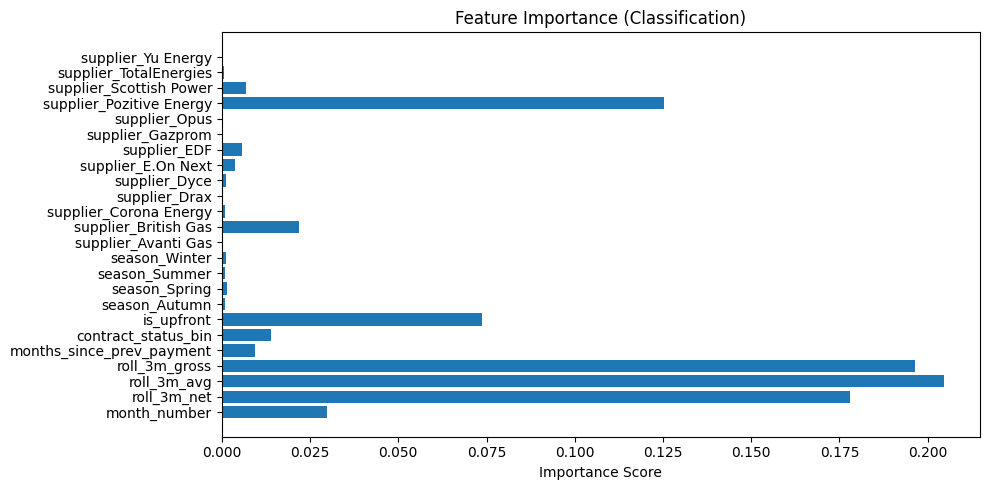

In [102]:
import matplotlib.pyplot as plt

# Get feature importances
importances_class = clf.feature_importances_
feature_names = X_class.columns

# Plot
plt.figure(figsize=(10, 5))
plt.barh(feature_names, importances_class)
plt.title("Feature Importance (Classification)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


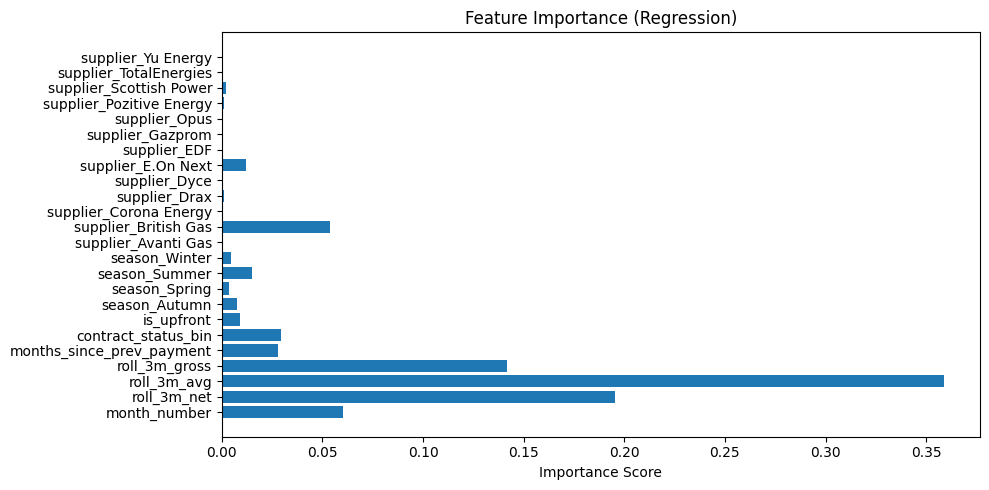

In [103]:
# Get feature importances
importances_reg = reg.feature_importances_
feature_names = X_reg.columns

# Plot
plt.figure(figsize=(10, 5))
plt.barh(feature_names, importances_reg)
plt.title("Feature Importance (Regression)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In [114]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

# --- Encode binary features ---
training_data["is_upfront"] = (training_data["Payment_Type"].str.lower() == "upfront").astype(int)
training_data["contract_status_bin"] = (training_data["contract_status"].str.lower() == "active").astype(int)

# --- One-hot encode season and supplier ---
season_dummies = pd.get_dummies(training_data["season"], prefix="season")
supplier_dummies = pd.get_dummies(training_data["supplier"], prefix="supplier")
training_data = pd.concat([training_data, season_dummies, supplier_dummies], axis=1)

# --- Define feature columns ---
features = [
    "month_number",
    "roll_3m_net",
    "roll_3m_avg",
    "roll_3m_gross",
    "months_since_prev_payment",
    "contract_status_bin",
    "is_upfront"
] + list(season_dummies.columns) + list(supplier_dummies.columns)

# --- Drop missing target values ---
training_data = training_data.dropna(subset=["will_pay_next_month", "next_month_payment"])

# --- Classification Data ---
X_class = training_data[features]
y_class = training_data["will_pay_next_month"]

Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# --- Regressor Data (only rows where payment expected) ---
X_reg = training_data[training_data["will_pay_next_month"] == 1][features]
y_reg = training_data[training_data["will_pay_next_month"] == 1]["next_month_payment"]

Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# ======================
# TRAIN CLASSIFIER
# ======================
clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)
clf.fit(Xc_train, yc_train)
y_pred_class = clf.predict(Xc_test)
accuracy = accuracy_score(yc_test, y_pred_class)
print("Classification Accuracy:", round(accuracy * 100, 2), "%")

# ======================
# TRAIN REGRESSOR
# ======================
reg = RandomForestRegressor(
    n_estimators=200,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=1,
    random_state=42
)
reg.fit(Xr_train, yr_train)
y_pred_reg = reg.predict(Xr_test)
rmse = np.sqrt(mean_squared_error(yr_test, y_pred_reg))
print("Regression RMSE:", round(rmse, 2))


Classification Accuracy: 85.42 %
Regression RMSE: 143.13
